# Homework Assignement 3 - Pre-Processing

Beatriz Gamboa Pereira - 201705220

In [4]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt

4. Consider the array above but without the NAs (replaced by some other value) and normalize the array by using:
- min-max normalization
- z-score normalization

This excercise refers to the previous one:

3. Consider the following array `<8,12,4,12,NA,9,7,1,15,NA,12,13,7,NA,23,12,NA,9,8,5,NA,21,13,NA,12,3,11,NA,10,6>`
Compare different methods of data imputation and their effect on the mean and standard deviation of the array. Consider the methods:
- replace by a constant value (e.g. -1)
- replace by the most frequent value
- replace by the mean
- replace each NA by a value sampled from the distribution of observed values.

We can compute both normalizations for each of the dat imputation methods mentioned in exercise 3 and compare the results.

The normalizations we are computing are

**Min-max normalization**
$$
x_{i}^{\prime}=\frac{x_{i}-\operatorname{min}_{x}}{\max _{x}-\min _{x}}
$$
**Z-score normalization (Standardization)**
$$
x_{i}^{\prime}=\frac{x_{i}-\operatorname{mean}_{x}}{\operatorname{std}_{x}}
$$

In [1]:
def min_max_normalization(data):
    data_min  = np.min(data)
    data_max  = np.max(data)
    norm_data = data * 0
    for i,dp in enumerate(data):
        norm_data[i] = (dp - data_min) / (data_max - data_min)
    return norm_data

def z_score_normalization(data):
    data_mean = np.mean(data)
    data_std  = np.std(data)
    norm_data = data * 0
    for i,dp in enumerate(data):
        norm_data[i] = (dp - data_mean) / data_std
    return norm_data

We can get the different arrays considered with

In [6]:
data = np.array([8,12,4,12,np.nan,9,7,1,15,np.nan,12,13,7,np.nan,23,12,np.nan,9,8,5,np.nan,21,13,np.nan,12,13,11,np.nan,10,6])

nan_indices = np.argwhere(np.isnan(data))
non_nan_ind = np.argwhere(~np.isnan(data))

clean_data = np.array(np.reshape(data[non_nan_ind],(23)),int)

new_data_constant = np.copy(data)
new_data_frequent = np.copy(data)
new_data_mean     = np.copy(data)
new_data_sampled  = np.copy(data)

#Replace by constant value

for i in nan_indices:
    new_data_constant[i] = -1 
    
#Replace by the most frequent value

data_mode = np.bincount(clean_data).argmax()
for i in nan_indices:
    new_data_frequent[i] = data_mode 
    
#Replace by the mean
    
data_mean = np.mean(clean_data)
for i in nan_indices:
    new_data_mean[i] = data_mean
    

#Replace by a value sampled from the dstribution
    
for i in nan_indices:
    j = rd.randint(0,len(clean_data)-1)
    new_data_sampled[i] = clean_data[j] 

Then, we can see the new normalized data distributions in different ways. With a plot that for each data imputation method compares both normalizations. Or with a plot that for each normalization compared the different data imputation method.

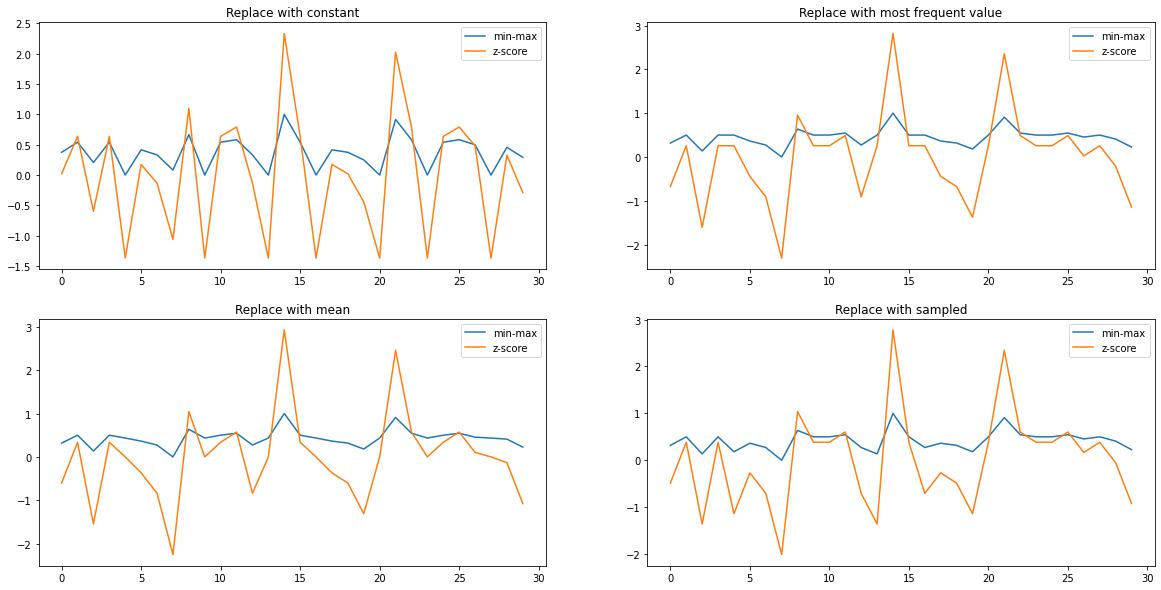

In [8]:
#for each data imputation method compare both normalizations
fig,ax = plt.subplots(2,2, figsize=(20,10))
data_types = [new_data_constant,new_data_frequent,new_data_mean,new_data_sampled]
columns = ['Replace with constant','Replace with most frequent value','Replace with mean','Replace with sampled']
cols = [0,0,1,1]
lins = [0,1,0,1]
for i in range(4):
    ax[cols[i],lins[i]].plot(min_max_normalization(data_types[i]),label='min-max')
    ax[cols[i],lins[i]].plot(z_score_normalization(data_types[i]),label='z-score')
    ax[cols[i],lins[i]].legend()
    ax[cols[i],lins[i]].title.set_text(columns[i])
plt.show()

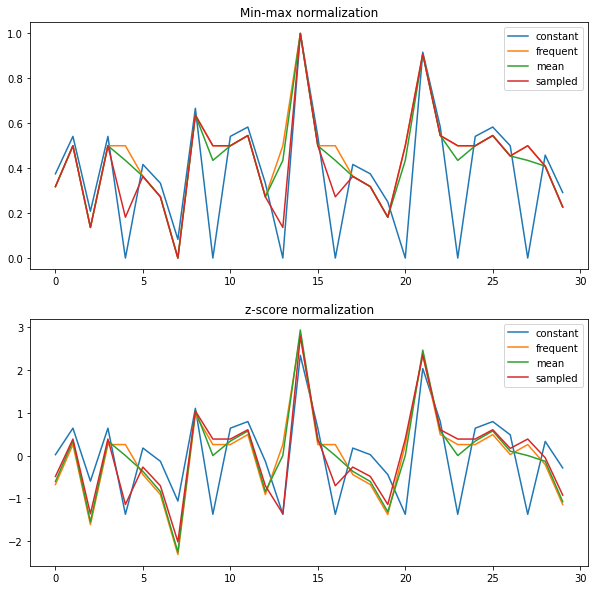

In [9]:
#for each normalization compare the different data imputation method
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))
titles = ['Min-max normalization', 'z-score normalization']
funcs = [min_max_normalization,z_score_normalization]
axs = [ax1,ax2]
def plot(f,i,a):
    a.plot(f(new_data_constant),label='constant')
    a.plot(f(new_data_frequent),label='frequent')
    a.plot(f(new_data_mean    ),label='mean')
    a.plot(f(new_data_sampled ),label='sampled')
    a.legend()
    a.title.set_text(titles[i])

for i in range(2):
    plot(funcs[i],i,axs[i])
plt.show()    

An example of the arrays we got for each normalization for the mean imputation method:

In [10]:
print('Data')
print(new_data_mean)
print('Min-max')
print(min_max_normalization(new_data_mean))
print('z-score')
print(z_score_normalization(new_data_mean))

Data
[ 8.         12.          4.         12.         10.56521739  9.
  7.          1.         15.         10.56521739 12.         13.
  7.         10.56521739 23.         12.         10.56521739  9.
  8.          5.         10.56521739 21.         13.         10.56521739
 12.         13.         11.         10.56521739 10.          6.        ]
Min-max
[0.31818182 0.5        0.13636364 0.5        0.43478261 0.36363636
 0.27272727 0.         0.63636364 0.43478261 0.5        0.54545455
 0.27272727 0.43478261 1.         0.5        0.43478261 0.36363636
 0.31818182 0.18181818 0.43478261 0.90909091 0.54545455 0.43478261
 0.5        0.54545455 0.45454545 0.43478261 0.40909091 0.22727273]
z-score
[-0.6037047   0.33766534 -1.54507474  0.33766534  0.         -0.36836219
 -0.83904721 -2.25110228  1.04369287  0.          0.33766534  0.57300785
 -0.83904721  0.          2.92643296  0.33766534  0.         -0.36836219
 -0.6037047  -1.30973223  0.          2.45574794  0.57300785  0.
  0.33766534  0.5